In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df_itm_cat = pd.read_csv('00-Input/item_categories.csv')
df_itm = pd.read_csv('00-Input/items.csv')
df_sh = pd.read_csv('00-Input/shops.csv')
df_tr = pd.read_csv('00-Input/sales_train.csv')
df_te = pd.read_csv('00-Input/test.csv')

## Aim / Goal -> Forcast total amount of products sold for the next month/months

### STEP-1: EDA
- Top 5 records
- Data Types / Info
- Shape Of Data
- Missing Values
- NULL values
- Describe
- Correlation

### STEP-2: Combined data into one dataframe
- Check for duplicates
- Cleaning

### STEP-3: visualization
- Yearly sales
- Monthly sales
- Monthly items count
- Weekly sales

### STEP-4: Outliers
- Identifying
- Handling

### STEP-5: Machine learning
- Data preparation
- Identify Methods for future sales forcasting

In [3]:
# Filter pandas DataFrame by substring critera
df_sh[df_sh['shop_name'].str.contains('! ', regex=False)]

,city,shop_name,shop_id
0,Yakutsk,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,Yakutsk,"! Yakutsk TC ""Central"" Franc",1


In [5]:
# getting rid of "!" before shop_names
df_sh['shop_name'] = df_sh['shop_name'].map(lambda x: x.split('!')[1] if x.startswith('!') else x)

In [6]:
# Cleaning shops data

df_tr.loc[df_tr.shop_id == 0, 'shop_id'] = 57
df_te.loc[df_te.shop_id == 0, 'shop_id'] = 57

df_tr.loc[df_tr.shop_id == 1, 'shop_id'] = 58
df_te.loc[df_te.shop_id == 1, 'shop_id'] = 58

df_tr.loc[df_tr.shop_id == 10, 'shop_id'] = 11
df_te.loc[df_te.shop_id == 10, 'shop_id'] = 11

In [7]:
df_sh.city.value_counts()

Moscow             13
Tyumen              3
Voronezh            3
Ufa                 2
Online              2
Nizhny Novgorod     2
Krasnoyarsk         2
Rostov-on-Don       2
Novosibirsk         2
Yakutsk             2
St. Petersburg      2
Kazan               2
Samara              2
Shop Online         1
Zhukovsky           1
Mytishchi           1
Kursk               1
Adygea              1
Surgut              1
Volzhsky            1
Tomsk               1
Vologda             1
Kaluga              1
Czech               1
Balashikha          1
Khimki              1
Sergiev Posad       1
Kolomna             1
Omsk                1
Yaroslavl           1
Name: city, dtype: int64

In [8]:
# EDA 

def EDA(df):
    print(" ")
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print(" ")
    print("----------Data Types-----------")
    print(df.dtypes)
    print(" ")
    print("----------INFO-----------------")
    print(df.info())
    print(" ")
    print("-----Data Shape-------------")
    print(df.shape)
    print(" ")
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print(" ")
    print("-------NULL values-------------")
    print(df.isna().sum())
    
    

In [9]:
print("*************** Item Categories ***************")
EDA(df_itm_cat)

*************** Item Categories ***************
 
----------TOP 5 RECORDS--------
      item_cat          item_category_name  item_category_id
0  PC-Headsets  PC - Headsets / Headphones                 0
1  Accessories           Accessories - PS2                 1
2  Accessories           Accessories - PS3                 2
3  Accessories           Accessories - PS4                 3
4  Accessories           Accessories - PSP                 4
 
----------Data Types-----------
item_cat              object
item_category_name    object
item_category_id       int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_cat            84 non-null     object
 1   item_category_name  84 non-null     object
 2   item_category_id    84 non-null     int64 
dtypes: int64(1), object(2)
memory usage:

In [10]:
df_itm_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [ ]:
print("*************** Items ***************")
EDA(df_itm)

In [ ]:
print("*************** Shops ***************")
EDA(df_sh)

In [ ]:
print("*************** Training Sales Data ***************")
EDA(df_tr)

In [ ]:
print("*************** Test data ***************")
EDA(df_te)

In [11]:
# Combining sales_train with item_categories
#df_itm_cat, df_itm, #df_sh, #df_tr

df_tr_itm = pd.merge(left=df_tr, right=df_itm, left_on='item_id', right_on='item_id')

In [12]:
df_tr_itm_cat = pd.merge(left=df_tr_itm, right=df_itm_cat, left_on='item_category_id', right_on='item_category_id')

In [13]:
df_tr_data = pd.merge(left=df_tr_itm_cat, right=df_sh, left_on='shop_id', right_on='shop_id')
df_tr_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_cat,item_category_name,city,shop_name
0,23.01.2013,0,24,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,Moscow,"Moscow SEC ""Atrium"""
1,10.10.2015,33,24,22154,299.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,Moscow,"Moscow SEC ""Atrium"""
2,02.07.2013,6,24,944,399.0,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Moscow,"Moscow SEC ""Atrium"""
3,19.07.2013,6,24,944,266.0,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Moscow,"Moscow SEC ""Atrium"""
4,30.07.2013,6,24,944,399.0,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Moscow,"Moscow SEC ""Atrium"""
...,...,...,...,...,...,...,...,...,...,...,...,...
2619759,22.10.2015,33,55,13093,250.0,1.0,Map Windows paying 250 rubles [Digital Version],36,Payment,Payment card - Windows (figure),Yaroslavl,"Yaroslavl shopping center ""Altair"""
2619760,21.09.2015,32,55,13091,1000.0,1.0,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),Yaroslavl,"Yaroslavl shopping center ""Altair"""
2619761,16.09.2015,32,55,13094,2500.0,1.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),Yaroslavl,"Yaroslavl shopping center ""Altair"""
2619762,22.09.2015,32,55,13094,2500.0,2.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),Yaroslavl,"Yaroslavl shopping center ""Altair"""


In [14]:
# rearranging dataframe columns
df_tr_data = df_tr_data[['date', 'date_block_num', 'city', 'shop_id', 'shop_name', 'item_id', 'item_name', 'item_category_id', 'item_cat', 'item_category_name', 'item_price', 'item_cnt_day']]
df_tr_data


,date,date_block_num,city,shop_id,shop_name,item_id,item_name,item_category_id,item_cat,item_category_name,item_price,item_cnt_day
0,23.01.2013,0,Moscow,24,"Moscow SEC ""Atrium""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,999.0,1.0
1,10.10.2015,33,Moscow,24,"Moscow SEC ""Atrium""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,299.0,1.0
2,02.07.2013,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,399.0,1.0
3,19.07.2013,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,266.0,1.0
4,30.07.2013,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,399.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2619759,22.10.2015,33,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13093,Map Windows paying 250 rubles [Digital Version],36,Payment,Payment card - Windows (figure),250.0,1.0
2619760,21.09.2015,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),1000.0,1.0
2619761,16.09.2015,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),2500.0,1.0
2619762,22.09.2015,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),2500.0,2.0


In [ ]:
# Checking for empty / null values
# df_tr_data.isna().sum() OR
df_tr_data.isnull().sum()

In [16]:
# Revenue for product sold
df_tr_data['revenue'] = df_tr_data.item_price * df_tr_data.item_cnt_day

In [17]:
# Converting the date into datetimelike format
df_tr_data['date'] = pd.to_datetime(df_tr_data['date'], errors='coerce')

In [18]:
# Get weekday, month and year from 'dteday' column
df_tr_data.loc[:,'day'] = df_tr_data.date.dt.day

df_tr_data.loc[:,'WEEKDAY'] = df_tr_data.date.dt.dayofweek
df_tr_data.loc[:,'weekday'] = df_tr_data.date.dt.day_name()

df_tr_data.loc[:,'MONTH'] = df_tr_data.date.dt.month
df_tr_data.loc[:,'month'] = df_tr_data.date.dt.month_name()
df_tr_data.loc[:,'year'] = df_tr_data.date.dt.year

df_tr_data.loc[:, 'month_year'] = pd.to_datetime(df_tr_data.date).dt.strftime('%Y-%m')


In [ ]:
df_tr_data.dtypes

In [20]:
df_tr_data

,date,date_block_num,city,shop_id,shop_name,item_id,item_name,item_category_id,item_cat,item_category_name,item_price,item_cnt_day,revenue,day,WEEKDAY,weekday,MONTH,month,year,month_year
0,2013-01-23,0,Moscow,24,"Moscow SEC ""Atrium""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,999.0,1.0,999.0,23,2,Wednesday,1,January,2013,2013-01
1,2015-10-10,33,Moscow,24,"Moscow SEC ""Atrium""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,299.0,1.0,299.0,10,5,Saturday,10,October,2015,2015-10
2,2013-02-07,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,399.0,1.0,399.0,7,3,Thursday,2,February,2013,2013-02
3,2013-07-19,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,266.0,1.0,266.0,19,4,Friday,7,July,2013,2013-07
4,2013-07-30,6,Moscow,24,"Moscow SEC ""Atrium""",944,2012 (BD),37,Movie,Movie - Blu-Ray,399.0,1.0,399.0,30,1,Tuesday,7,July,2013,2013-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619759,2015-10-22,33,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13093,Map Windows paying 250 rubles [Digital Version],36,Payment,Payment card - Windows (figure),250.0,1.0,250.0,22,3,Thursday,10,October,2015,2015-10
2619760,2015-09-21,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),1000.0,1.0,1000.0,21,0,Monday,9,September,2015,2015-09
2619761,2015-09-16,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),2500.0,1.0,2500.0,16,2,Wednesday,9,September,2015,2015-09
2619762,2015-09-22,32,Yaroslavl,55,"Yaroslavl shopping center ""Altair""",13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment,Payment card - Windows (figure),2500.0,2.0,5000.0,22,1,Tuesday,9,September,2015,2015-09


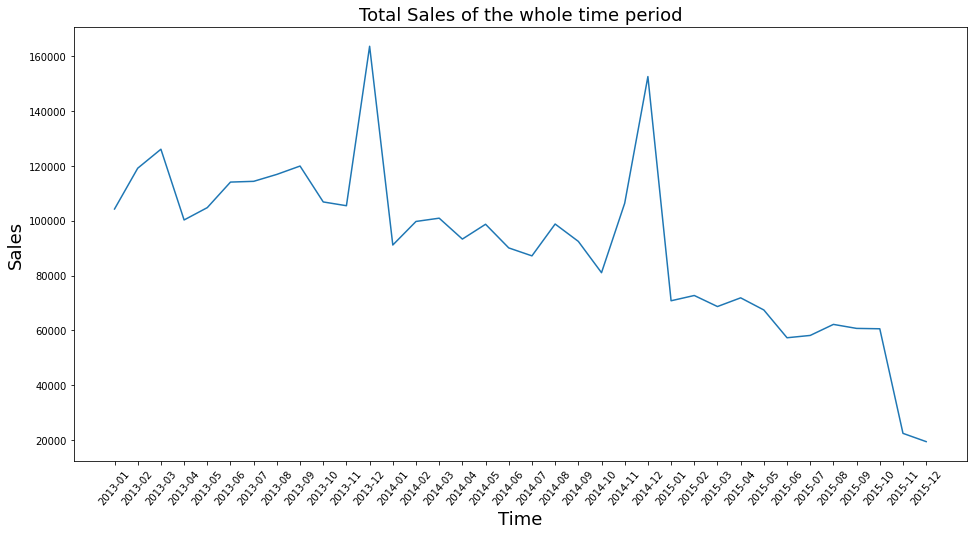

In [25]:
sales_month = df_tr_data.groupby(["month_year"])["item_cnt_day"].sum()
sales_month.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the whole time period', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xticks(rotation=50)
#plt.gcf().autofmt_xdate() # x-axis labels with angle 
plt.plot(sales_month)

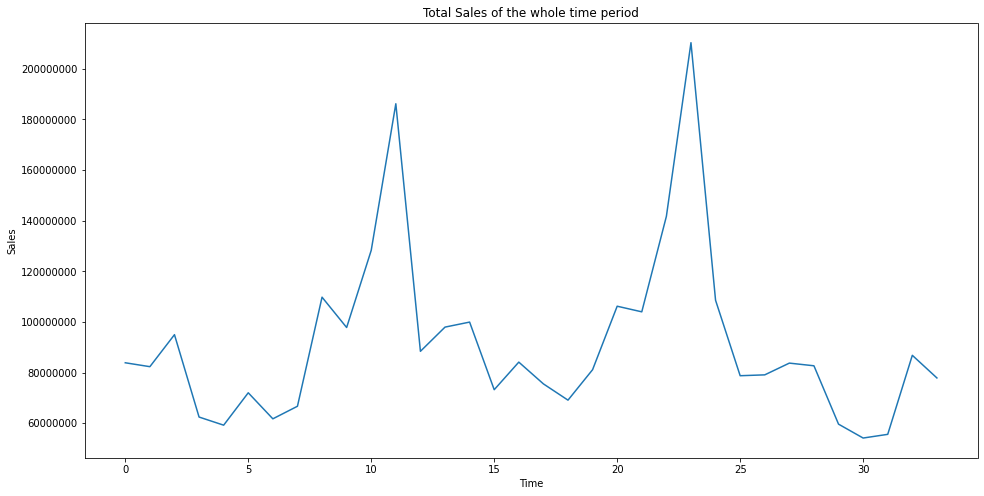

In [19]:
sales_month = df_tr_data.groupby(["date_block_num"])["revenue"].sum()
sales_month.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the whole time period')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.ticklabel_format(axis='y', style='plain')
plt.plot(sales_month)

In [41]:
#df_tr_data.groupby(['year', 'item_cat', 'item_category_name']).size()

In [ ]:
# Top catogieries for the sold items

#df_tr_data.groupby('year').item_category_name.value_counts()
#df_tr_data[df_tr_data['year']==2013].item_category_name.value_counts()

In [ ]:
#plt.plot(MONTHS, dfp[dfp.year==2013].item_cnt_month, '-o', color='steelblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2013')

<AxesSubplot:xlabel='MONTH', ylabel='item_cnt_day'>

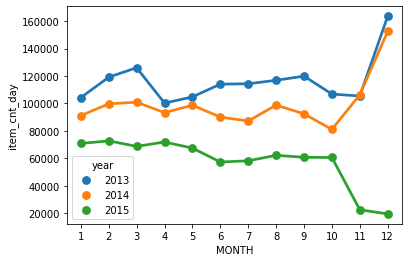

In [43]:
grouped = pd.DataFrame(df_tr_data.groupby(['year','MONTH'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='MONTH', y='item_cnt_day', hue='year', data=grouped)

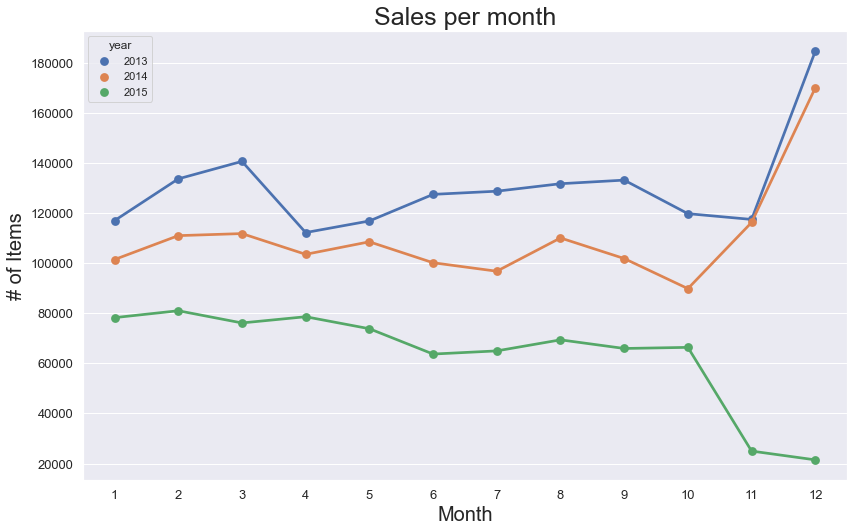

In [32]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.pointplot(data=df_tr_data.groupby(['MONTH', 'year'])['item_cnt_day'].sum().reset_index(), x='MONTH', y='item_cnt_day', hue='year')


plt.title('Sales per month',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.tick_params(labelsize=13)

In [33]:
#df1 = df_tr_data.groupby(['MONTH', 'year']).item_price.sum().reset_index()
#sns.lineplot(data=df1, x='MONTH', y='item_price', hue='year', sort=False)

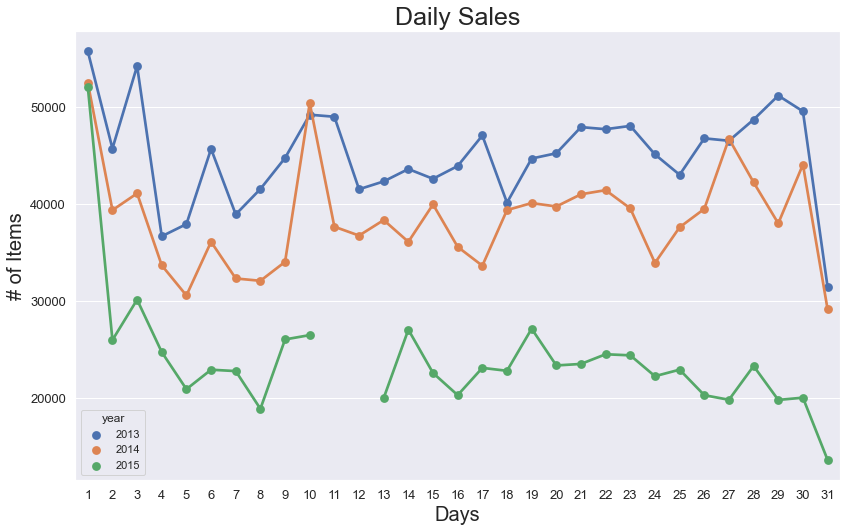

In [46]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data.groupby(['day', 'year'])['item_cnt_day'].sum().reset_index(), x='day', y='item_cnt_day', hue='year')

#sns.catplot(x='day', y='item_cnt_day', hue='year', data=df_tr_data, estimator=sum, kind='point', height=8.27, aspect=13.7/8.27)

plt.title('Daily Sales',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.tick_params(labelsize=13)

In [37]:
#tem2=df_tr_data[(df_tr_data['year']==2015)].day.value_counts().reset_index()
#tem2

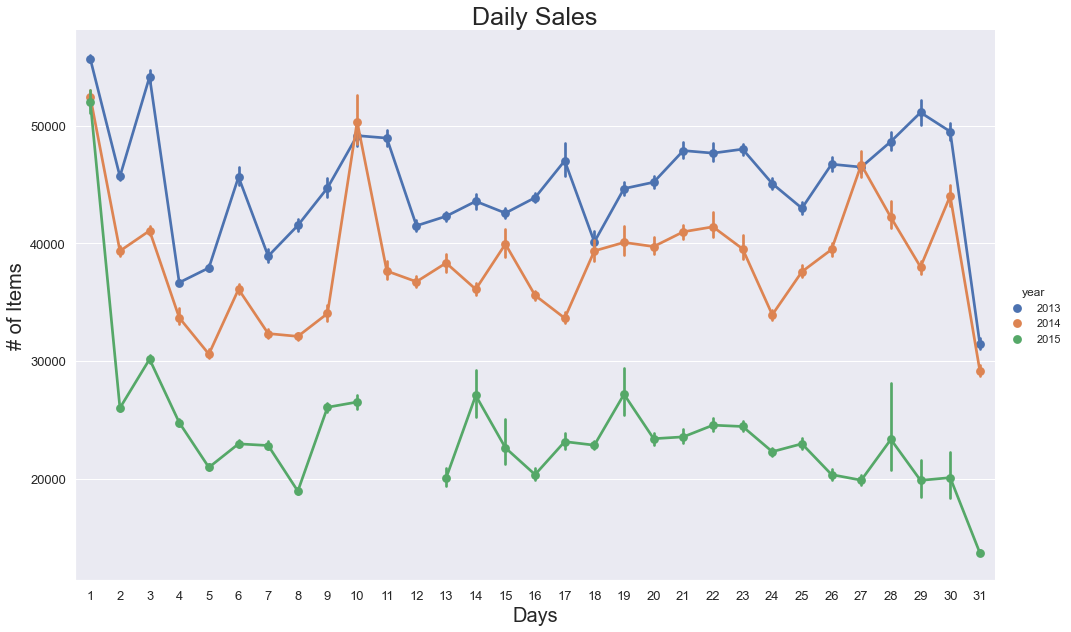

In [44]:
# month_sale = df_tr_data.groupby(['month', 'year'])['item_cnt_day'].sum()
sns.catplot(x='day', y='item_cnt_day', hue='year', data=df_tr_data, estimator=sum, kind='point', height=8.27, aspect=13.7/8.27)

plt.title('Daily Sales',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.tick_params(labelsize=13)

In [37]:
temp = df_tr_data.groupby(['weekday', 'year'])['item_cnt_day'].sum().reset_index()
temp.head()

,weekday,year,item_cnt_day
0,Friday,2013,245333.0
1,Friday,2014,188516.0
2,Friday,2015,113515.0
3,Monday,2013,192900.0
4,Monday,2014,160851.0


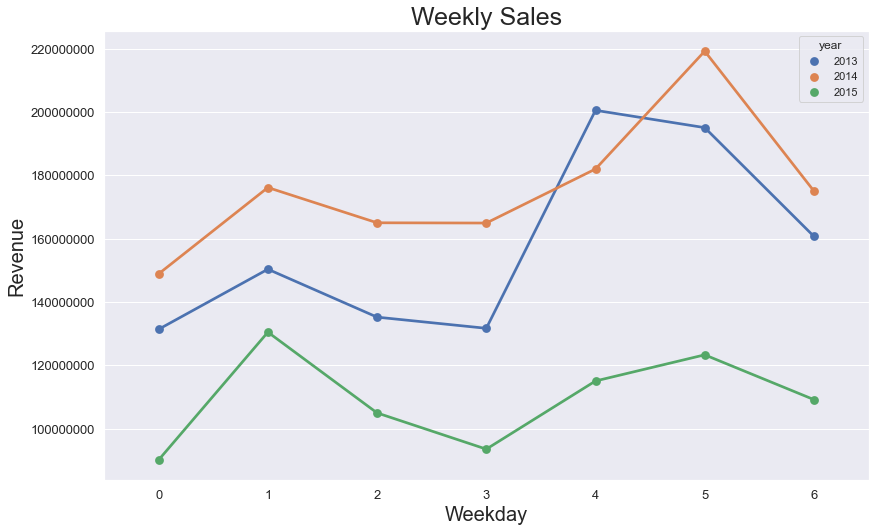

In [49]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data.groupby(['WEEKDAY', 'year'])['revenue'].sum().reset_index(), x='WEEKDAY', y='revenue', hue='year')

plt.title('Weekly Sales',fontsize=25)
plt.ylabel('Revenue',fontsize=20)
plt.xlabel('Weekday',fontsize=20)
plt.ticklabel_format(axis='y', style='plain')
plt.tick_params(labelsize=13)

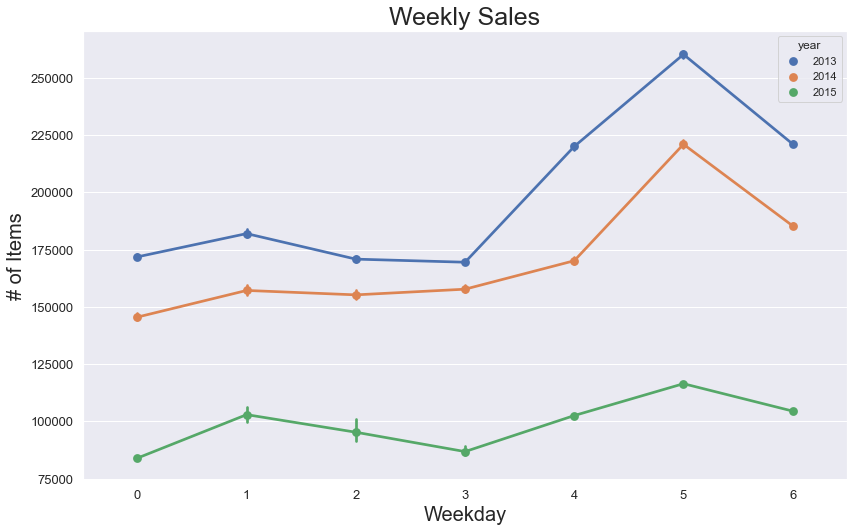

In [35]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data, x='WEEKDAY', y='item_cnt_day', hue='year', estimator = sum)

plt.title('Weekly Sales',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Weekday',fontsize=20)
plt.tick_params(labelsize=13)

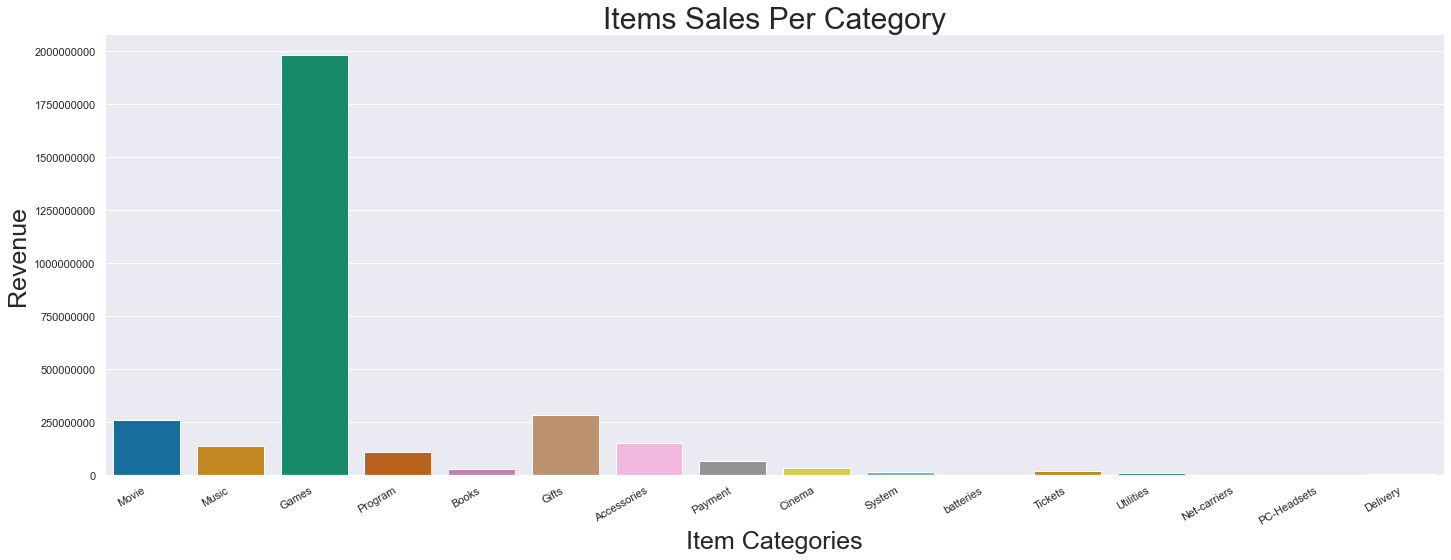

In [36]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(df_tr_data['item_cat'], df_tr_data['revenue'], estimator=sum, palette = 'colorblind', ci=None)
plt.title('Items Sales Per Category', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 25)
plt.ylabel('Revenue', fontsize = 25)
plt.ticklabel_format(axis='y', style='plain')
plt.gcf().autofmt_xdate() # x-axis labels with angle 

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Movie'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Program'),
  Text(4, 0, 'Books'),
  Text(5, 0, 'Gifts'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Payment'),
  Text(8, 0, 'Cinema'),
  Text(9, 0, 'System'),
  Text(10, 0, 'batteries'),
  Text(11, 0, 'Tickets'),
  Text(12, 0, 'Utilities'),
  Text(13, 0, 'Net-carriers'),
  Text(14, 0, 'PC-Headsets'),
  Text(15, 0, 'Delivery')])

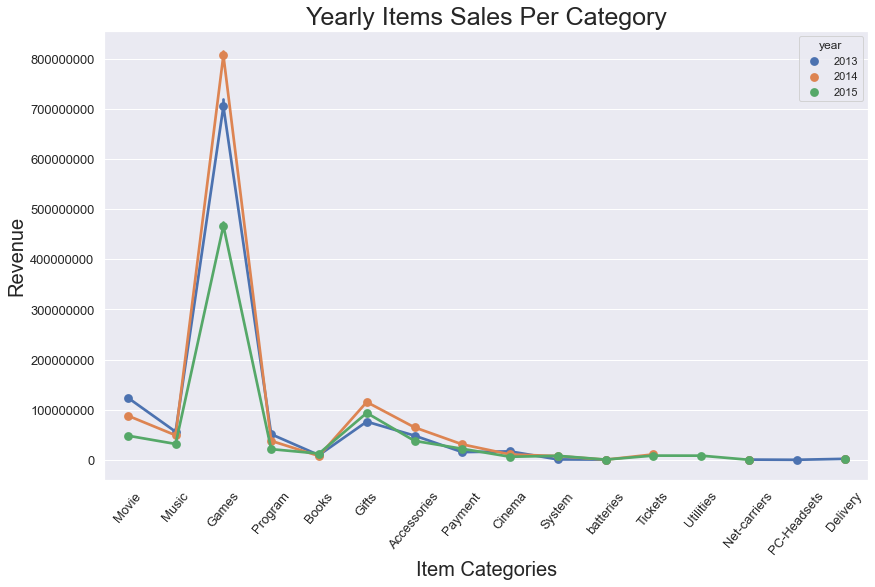

In [43]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data, x='item_cat', y='revenue', hue='year', estimator = sum)

plt.title('Yearly Items Sales Per Category',fontsize=25)
plt.ylabel('Revenue',fontsize=20)
plt.xlabel('Item Categories',fontsize=20)
plt.tick_params(labelsize=13)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=50)

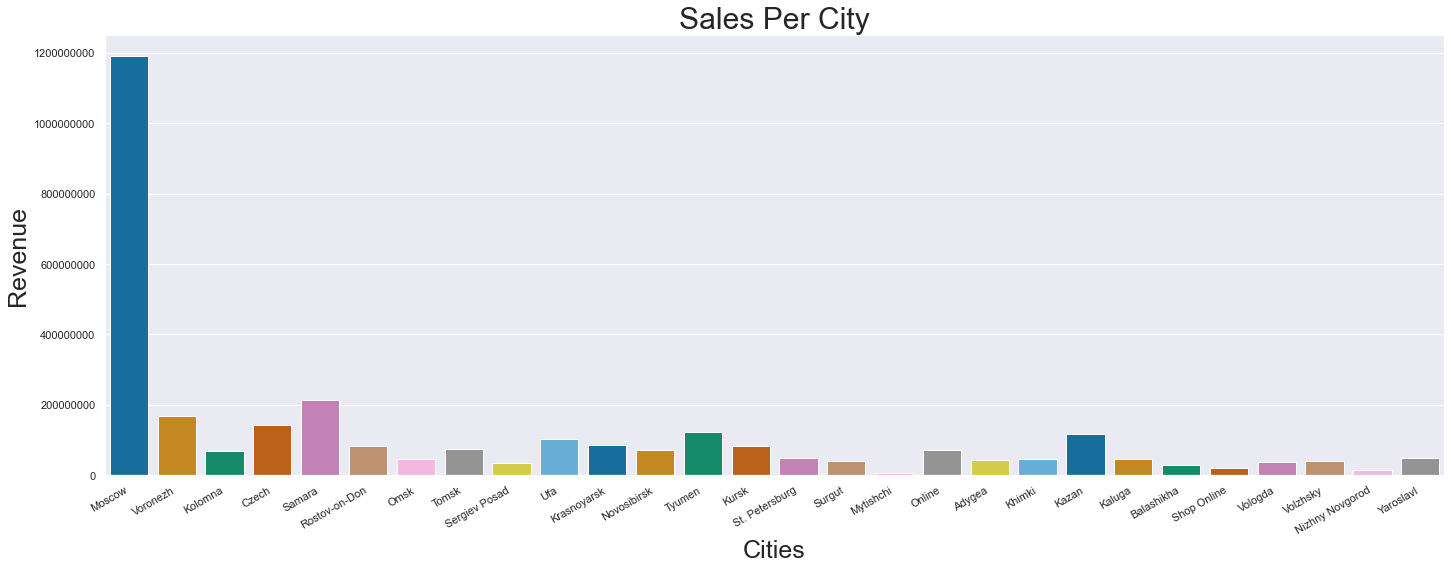

In [41]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(df_tr_data['city'], df_tr_data['revenue'], estimator=sum, palette = 'colorblind', ci=None)
plt.title('Sales Per City', fontsize = 30)
plt.xlabel('Cities', fontsize = 25)
plt.ylabel('Revenue', fontsize = 25)
plt.ticklabel_format(axis='y', style='plain')
plt.gcf().autofmt_xdate() # x-axis labels with angle 

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Moscow'),
  Text(1, 0, 'Voronezh'),
  Text(2, 0, 'Kolomna'),
  Text(3, 0, 'Czech'),
  Text(4, 0, 'Samara'),
  Text(5, 0, 'Rostov-on-Don'),
  Text(6, 0, 'Omsk'),
  Text(7, 0, 'Tomsk'),
  Text(8, 0, 'Sergiev Posad'),
  Text(9, 0, 'Ufa'),
  Text(10, 0, 'Krasnoyarsk'),
  Text(11, 0, 'Novosibirsk'),
  Text(12, 0, 'Tyumen'),
  Text(13, 0, 'Kursk'),
  Text(14, 0, 'St. Petersburg'),
  Text(15, 0, 'Surgut'),
  Text(16, 0, 'Mytishchi'),
  Text(17, 0, 'Online'),
  Text(18, 0, 'Adygea'),
  Text(19, 0, 'Khimki'),
  Text(20, 0, 'Kazan'),
  Text(21, 0, 'Kaluga'),
  Text(22, 0, 'Balashikha'),
  Text(23, 0, 'Shop Online'),
  Text(24, 0, 'Vologda'),
  Text(25, 0, 'Volzhsky'),
  Text(26, 0, 'Nizhny Novgorod'),
  Text(27, 0, 'Yaroslavl')])

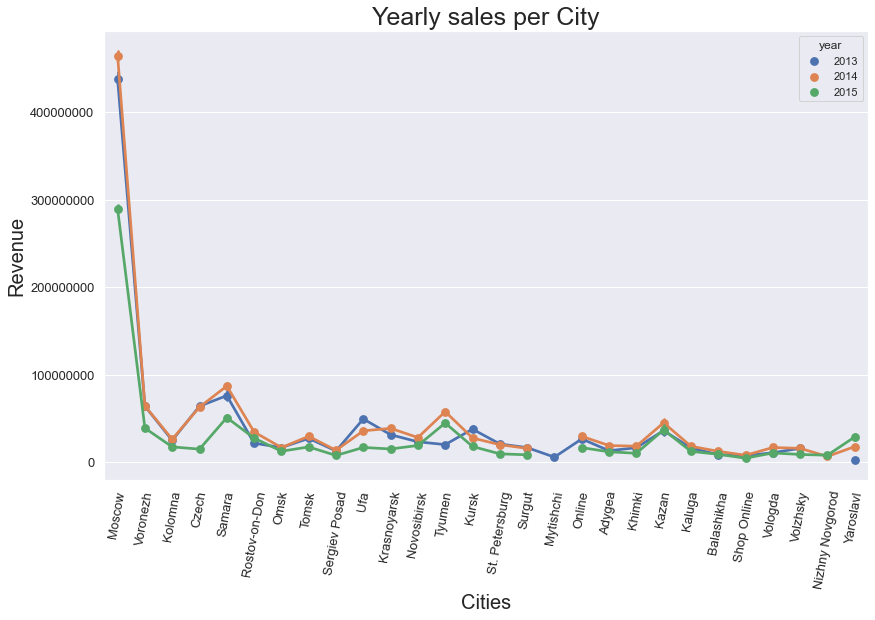

In [55]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data, x='city', y='revenue', hue='year', estimator = sum)

plt.title('Yearly sales per City',fontsize=25)
plt.ylabel('Revenue',fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.tick_params(labelsize=13)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=80)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


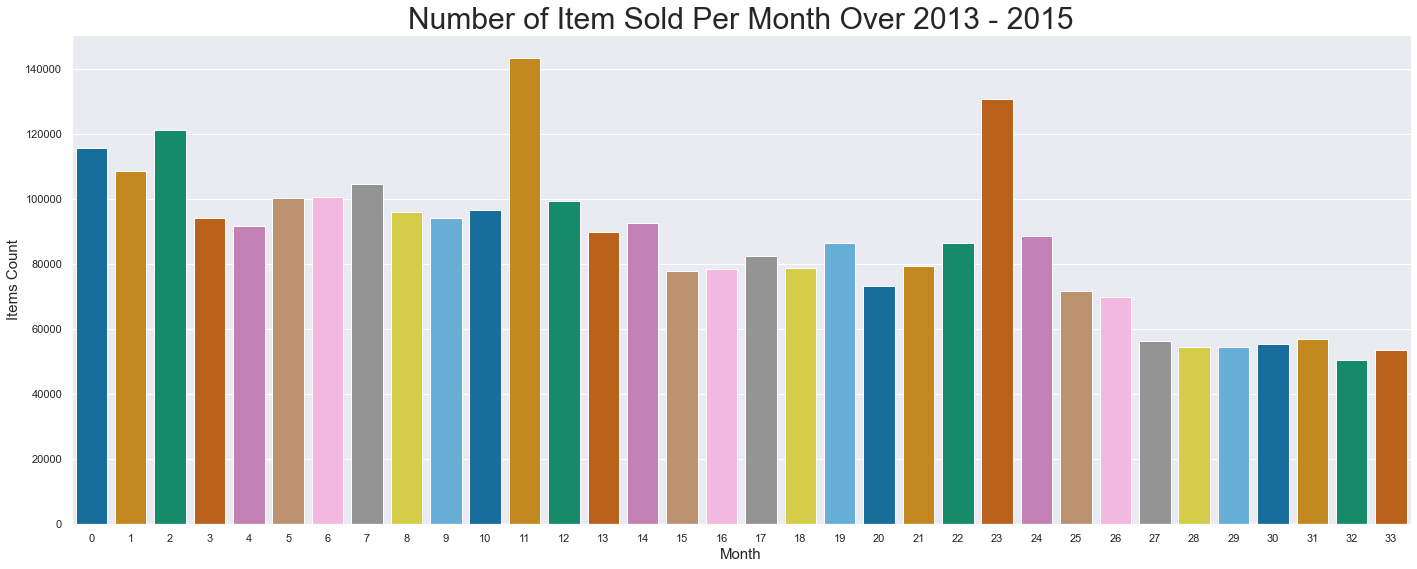

In [35]:
#plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(df_tr_data['date_block_num'], palette = 'colorblind')
plt.title('Number of Item Sold Per Month Over 2013 - 2015', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Items Count', fontsize = 15)
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_sh['city']))


plt.title('Wordcloud for City Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightyellow',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_itm_cat['item_cat']))


plt.title('Wordcloud for Item Category Names', fontsize = 24)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

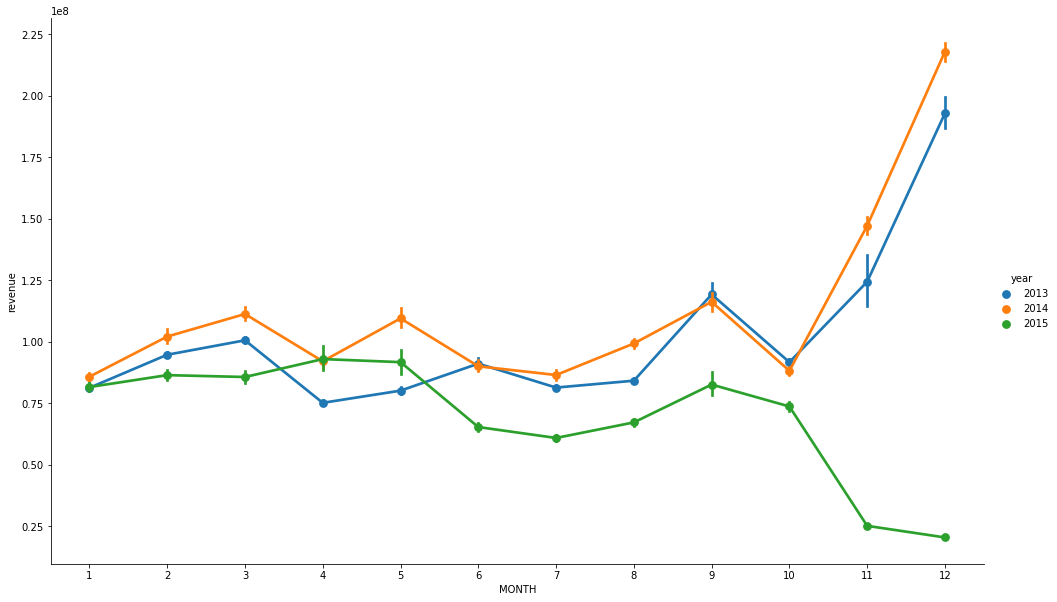

In [26]:
# month_sale = df_tr_data.groupby(['month', 'year'])['item_cnt_day'].sum()
sns.catplot(x='MONTH', y='revenue', hue='year', data=df_tr_data, estimator=sum, kind='point', height=8.27, aspect=13.7/8.27)

In [101]:
corr = df_tr_data.corr()
corr

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,revenue,day,year,MONTH,WEEKDAY
date_block_num,1.000000,0.019273,0.009356,0.029128,0.095010,0.009402,0.040056,0.054781,0.928280,0.151542,-0.015300
shop_id,0.019273,1.000000,0.029396,0.019380,-0.024034,-0.005230,-0.013424,0.003573,0.011805,0.015952,0.013155
item_id,0.009356,0.029396,1.000000,0.369431,-0.134104,0.016650,-0.062941,-0.002310,0.010340,-0.003123,0.005710
item_category_id,0.029128,0.019380,0.369431,1.000000,-0.253554,0.014768,-0.116882,0.000752,0.030141,-0.003388,-0.004509
item_price,0.095010,-0.024034,-0.134104,-0.253554,1.000000,0.011197,0.433725,0.019186,0.080192,0.031974,-0.007989
item_cnt_day,0.009402,-0.005230,0.016650,0.014768,0.011197,1.000000,0.407954,0.008780,0.002699,0.008592,-0.004303
revenue,0.040056,-0.013424,-0.062941,-0.116882,0.433725,0.407954,1.000000,0.017754,0.029289,0.021023,-0.008055
day,0.054781,0.003573,-0.002310,0.000752,0.019186,0.008780,0.017754,1.000000,-0.034113,0.035104,0.061660
year,0.928280,0.011805,0.010340,0.030141,0.080192,0.002699,0.029289,-0.034113,1.000000,-0.086033,-0.005560
MONTH,0.151542,0.015952,-0.003123,-0.003388,0.031974,0.008592,0.021023,0.035104,-0.086033,1.000000,-0.034755


In [110]:
# Convert scientific notation to more readable format
pd.options.display.float_format = '{:.2f}'.format

In [111]:
df_tr_data.describe()

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day,revenue,day,year,MONTH,WEEKDAY
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,40.00,890.85,1.24,1157.73,15.67,2013.78,6.43,3.24
std,9.42,16.23,6324.30,17.10,1729.80,2.62,5683.60,9.13,0.77,3.50,2.01
min,0.00,0.00,0.00,0.00,-1.00,-22.00,-68970.00,1.00,2013.00,1.00,0.00
25%,7.00,22.00,4476.00,28.00,249.00,1.00,249.00,7.00,2013.00,3.00,1.00
50%,14.00,31.00,9343.00,40.00,399.00,1.00,449.00,16.00,2014.00,6.00,3.00
75%,23.00,47.00,15684.00,55.00,999.00,1.00,1078.20,24.00,2014.00,9.00,5.00
max,33.00,59.00,22169.00,83.00,307980.00,2169.00,1829990.00,31.00,2015.00,12.00,6.00


<AxesSubplot:>

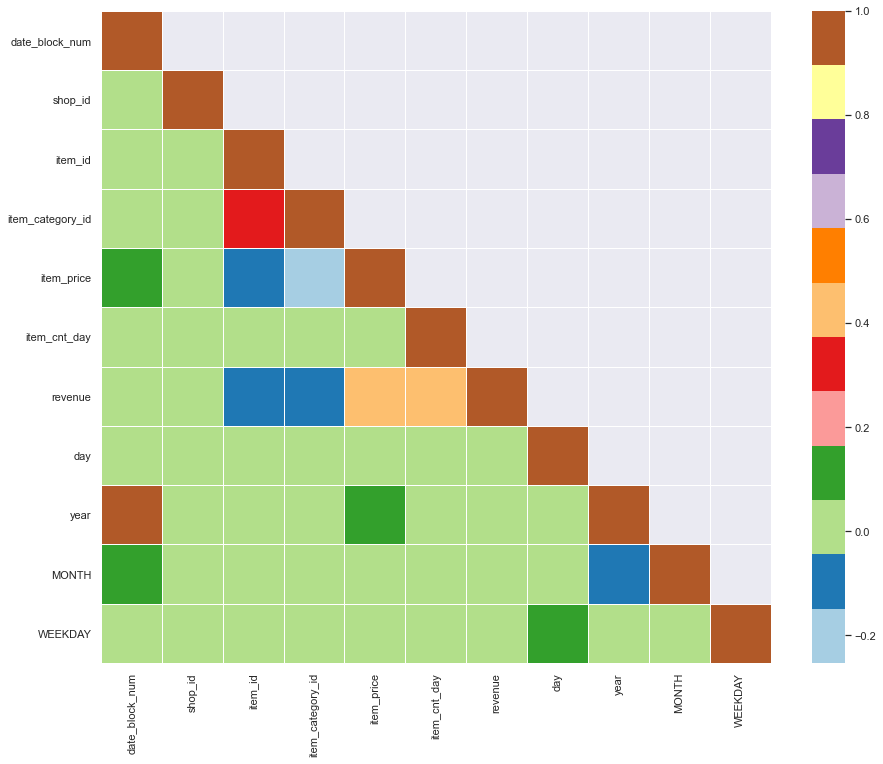

In [112]:
corr = df_tr_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)
sns.heatmap(corr,linewidths=.5,cmap="Paired",mask=mask)

In [50]:
df_tr_data.columns

Index(['date', 'date_block_num', 'city', 'shop_id', 'shop_name', 'item_id',
       'item_name', 'item_category_id', 'item_cat', 'item_category_name',
       'item_price', 'item_cnt_day', 'revenue', 'day', 'WEEKDAY', 'weekday',
       'MONTH', 'month', 'year', 'month_year'],
      dtype='object')

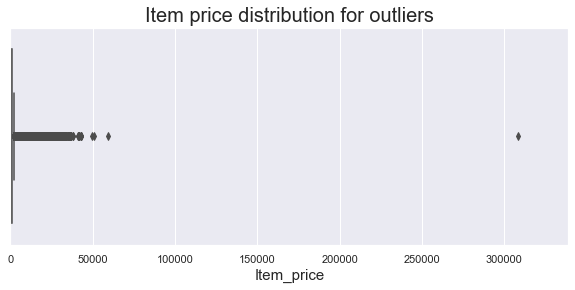

In [53]:
plt.figure(figsize=(10,4))
plt.xlim(df_tr_data.item_price.min(), df_tr_data.item_price.max()*1.1)
sns.boxplot(x=df_tr_data.item_price)
plt.title('Item price distribution for outliers', fontsize = 20)
plt.xlabel('Item_price', fontsize = 15)
plt.show()

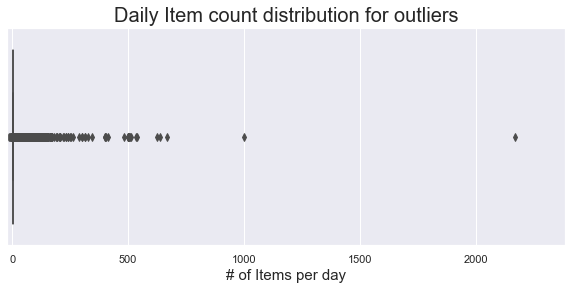

In [54]:
plt.figure(figsize=(10,4))
plt.xlim(df_tr_data.item_cnt_day.min(), df_tr_data.item_cnt_day.max()*1.1)
sns.boxplot(x=df_tr_data.item_cnt_day)
plt.title('Daily Item count distribution for outliers', fontsize = 20)
plt.xlabel('# of Items per day', fontsize = 15)
plt.show()

In [105]:
df_te

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [114]:
df_tr.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum()

date_block_num  shop_id  item_id
0               0        32        6.00
                         33        3.00
                         35        1.00
                         43        1.00
                         51        2.00
                                   ... 
33              59       22087     6.00
                         22088     2.00
                         22091     1.00
                         22100     1.00
                         22102     1.00
Name: item_cnt_day, Length: 1609124, dtype: float64

In [121]:
df_tr[(df_tr['date_block_num']==31)].groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum()

date_block_num  shop_id  item_id
31              2        32        1.00
                         70        1.00
                         482       1.00
                         792       2.00
                         806       1.00
                                   ... 
                59       22088     7.00
                         22092     1.00
                         22102     2.00
                         22105     1.00
                         22162     1.00
Name: item_cnt_day, Length: 33486, dtype: float64

In [ ]:
df_tr[(df_tr['date_block_num']== 2015)].sum()